In [25]:
!pip install MiniSom

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [27]:
df = pd.read_csv("Train_set.csv")

In [28]:
df

,_id,Disease,Year,PROVINCE,Week_no,Count
0,1,Hand Foot Mouth,2013,Bangkok,1,62.0
1,2,Hand Foot Mouth,2013,Bangkok,2,95.0
2,3,Hand Foot Mouth,2013,Bangkok,3,88.0
3,4,Hand Foot Mouth,2013,Bangkok,4,86.0
4,5,Hand Foot Mouth,2013,Bangkok,5,132.0
...,...,...,...,...,...,...
40189,40190,Hand Foot Mouth,2022,Narathiwat,48,13.0
40190,40191,Hand Foot Mouth,2022,Narathiwat,49,11.0
40191,40192,Hand Foot Mouth,2022,Narathiwat,50,6.0
40192,40193,Hand Foot Mouth,2022,Narathiwat,51,13.0


In [29]:
x = df.iloc[4080:4100, :].values
print(x)

[[4081 'Hand Foot Mouth' 2013 'Narathiwat' 53 4.0]
 [4082 'Hand Foot Mouth' 2014 'Bangkok' 1 93.0]
 [4083 'Hand Foot Mouth' 2014 'Bangkok' 2 118.0]
 [4084 'Hand Foot Mouth' 2014 'Bangkok' 3 87.0]
 [4085 'Hand Foot Mouth' 2014 'Bangkok' 4 65.0]
 [4086 'Hand Foot Mouth' 2014 'Bangkok' 5 112.0]
 [4087 'Hand Foot Mouth' 2014 'Bangkok' 6 70.0]
 [4088 'Hand Foot Mouth' 2014 'Bangkok' 7 80.0]
 [4089 'Hand Foot Mouth' 2014 'Bangkok' 8 97.0]
 [4090 'Hand Foot Mouth' 2014 'Bangkok' 9 141.0]
 [4091 'Hand Foot Mouth' 2014 'Bangkok' 10 123.0]
 [4092 'Hand Foot Mouth' 2014 'Bangkok' 11 140.0]
 [4093 'Hand Foot Mouth' 2014 'Bangkok' 12 101.0]
 [4094 'Hand Foot Mouth' 2014 'Bangkok' 13 104.0]
 [4095 'Hand Foot Mouth' 2014 'Bangkok' 14 107.0]
 [4096 'Hand Foot Mouth' 2014 'Bangkok' 15 69.0]
 [4097 'Hand Foot Mouth' 2014 'Bangkok' 16 86.0]
 [4098 'Hand Foot Mouth' 2014 'Bangkok' 17 76.0]
 [4099 'Hand Foot Mouth' 2014 'Bangkok' 18 68.0]
 [4100 'Hand Foot Mouth' 2014 'Bangkok' 19 65.0]]


In [30]:
sc = MinMaxScaler()

feature = ['Count']
df[feature] = sc.fit_transform(df[feature])
print(df)

df = df.sort_values(by=['PROVINCE', 'Year', 'Week_no'])

# Create a lag feature for 'Count' (e.g., 1-week lag)
df['Count_lag1'] = df.groupby(['PROVINCE'])['Count'].shift(1)

# You can create additional lag features, for example, a 2-week lag
df['Count_lag2'] = df.groupby(['PROVINCE'])['Count'].shift(2)


df['Std_4weeks'] = df.groupby(['PROVINCE'])['Count'].transform(lambda x: x.rolling(window=4, min_periods=1).std())

# Replace NaN values with 0 for Std_4weeks where initial weeks might have them
df['Std_4weeks'].fillna(0, inplace=True)

df.fillna(0, inplace=True)
# Inspect the DataFrame
print(df)

         _id          Disease  Year    PROVINCE  Week_no     Count
0          1  Hand Foot Mouth  2013     Bangkok        1  0.069507
1          2  Hand Foot Mouth  2013     Bangkok        2  0.106502
2          3  Hand Foot Mouth  2013     Bangkok        3  0.098655
3          4  Hand Foot Mouth  2013     Bangkok        4  0.096413
4          5  Hand Foot Mouth  2013     Bangkok        5  0.147982
...      ...              ...   ...         ...      ...       ...
40189  40190  Hand Foot Mouth  2022  Narathiwat       48  0.014574
40190  40191  Hand Foot Mouth  2022  Narathiwat       49  0.012332
40191  40192  Hand Foot Mouth  2022  Narathiwat       50  0.006726
40192  40193  Hand Foot Mouth  2022  Narathiwat       51  0.014574
40193  40194  Hand Foot Mouth  2022  Narathiwat       52  0.013453

[40194 rows x 6 columns]
         _id          Disease  Year       PROVINCE  Week_no     Count  \
1325    1326  Hand Foot Mouth  2013  Amnat Charoen        1  0.010090   
1326    1327  Hand Foot 

In [31]:
x = df.iloc[520:550, :].values
print(x)

[[37541 'Hand Foot Mouth' 2022 'Amnat Charoen' 51 0.0033632286995515697
  0.0033632286995515697 0.008968609865470852 0.0030358887909699758]
 [37542 'Hand Foot Mouth' 2022 'Amnat Charoen' 52 0.008968609865470852
  0.0033632286995515697 0.0033632286995515697 0.0032362683250538576]
 [266 'Hand Foot Mouth' 2013 'Ang Thong' 1 0.006726457399103139 0.0 0.0
  0.0]
 [267 'Hand Foot Mouth' 2013 'Ang Thong' 2 0.011210762331838564
  0.006726457399103139 0.0 0.003170882426845504]
 [268 'Hand Foot Mouth' 2013 'Ang Thong' 3 0.004484304932735426
  0.011210762331838564 0.006726457399103139 0.003424944465587324]
 [269 'Hand Foot Mouth' 2013 'Ang Thong' 4 0.005605381165919282
  0.004484304932735426 0.011210762331838564 0.0029483807619692633]
 [270 'Hand Foot Mouth' 2013 'Ang Thong' 5 0.005605381165919282
  0.005605381165919282 0.004484304932735426 0.0030358887909700894]
 [271 'Hand Foot Mouth' 2013 'Ang Thong' 6 0.004484304932735426
  0.005605381165919282 0.005605381165919282 0.0006472536650107881]
 [272

Silhouette Score: 0.30090472899445686


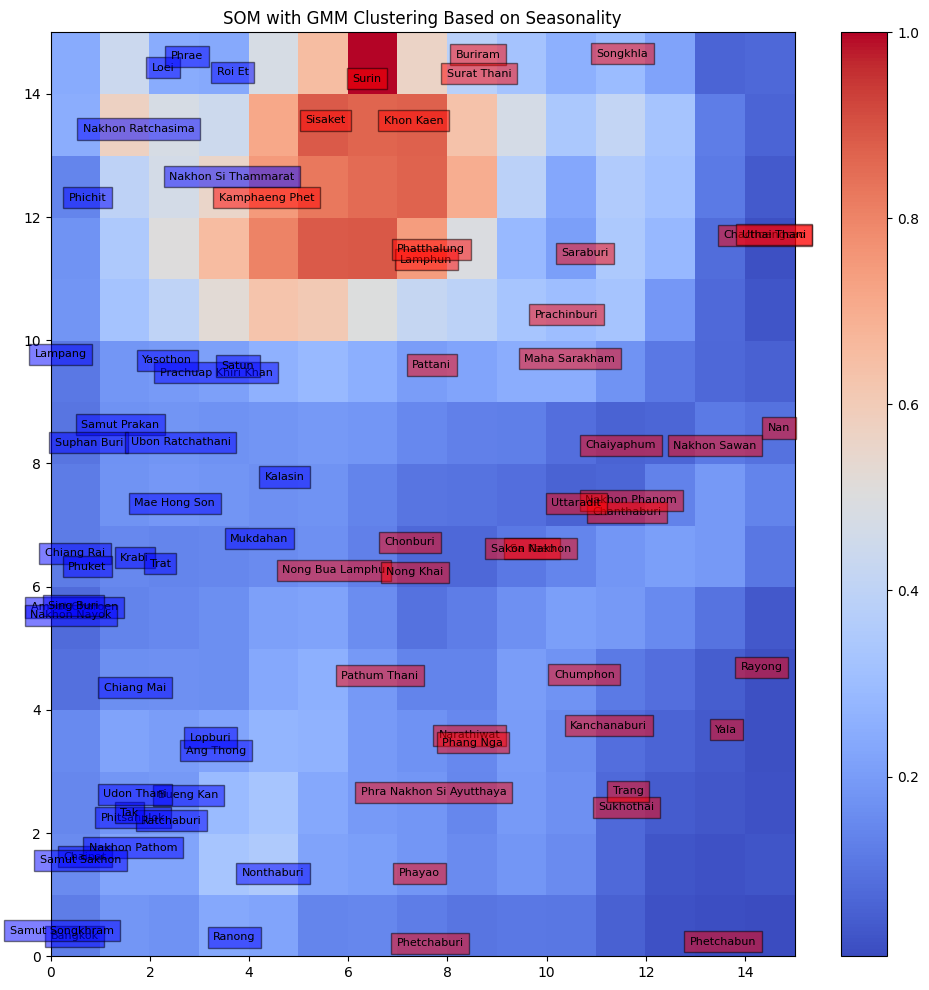

In [32]:
import pandas as pd
import numpy as np
from minisom import MiniSom
from sklearn.preprocessing import RobustScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Calculate seasonality feature
df['Year_Group'] = df['Year'].astype(str) + '-' + df['Week_no'].astype(str)
weekly = df.groupby(['PROVINCE', 'Year', 'Week_no'])['Count'].mean().reset_index()
weekly_std = weekly.groupby(['PROVINCE', 'Week_no'])['Count'].std().reset_index(name='Weekly_Std')
weekly_avg = weekly.groupby(['PROVINCE', 'Week_no'])['Count'].mean().reset_index(name='Weekly_Avg')
seasonality_index = pd.merge(weekly_avg, weekly_std, on=['PROVINCE', 'Week_no'])
seasonality_index['Seasonality_Score'] = seasonality_index['Weekly_Std'] / seasonality_index['Weekly_Avg']
seasonality_feature = seasonality_index.groupby('PROVINCE')['Seasonality_Score'].mean().reset_index()

# Focus only on the seasonality feature
X = seasonality_feature[['Seasonality_Score']].values

# Normalize using RobustScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(seasonality_feature[['Seasonality_Score']].values)

# Define the SOM and train using only Seasonality_Score
som_size_x = 15
som_size_y = 15
som = MiniSom(som_size_x, som_size_y, input_len=X_scaled.shape[1], sigma=1.5, learning_rate=0.3)
som.random_weights_init(X_scaled)
som.train_random(X_scaled, 3000)

# Extract winning nodes and apply clustering
winning_nodes = np.array([som.winner(x) for x in X_scaled])
winning_node_features = np.apply_along_axis(lambda x: x[0] * som_size_y + x[1], 1, winning_nodes)

gmm = GaussianMixture(n_components=2, random_state=0)
gmm_labels = gmm.fit_predict(winning_node_features.reshape(-1, 1))

seasonality_feature['Cluster'] = gmm_labels

# Evaluate with Silhouette Score
sil_score = silhouette_score(X_scaled, gmm_labels)
print(f'Silhouette Score: {sil_score}')

# Plot with updated clustering
plt.figure(figsize=(12, 12))
plt.pcolor(som.distance_map().T, cmap='coolwarm')
plt.colorbar()

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i, (x, y) in enumerate(winning_nodes):
    x_offset = np.random.uniform(-0.3, 0.3)
    y_offset = np.random.uniform(-0.3, 0.3)
    plt.text(x + 0.5 + x_offset, y + 0.5 + y_offset, seasonality_feature['PROVINCE'][i],
             ha='center', va='center', bbox=dict(facecolor=colors[seasonality_feature['Cluster'][i] % len(colors)], alpha=0.5), fontsize=8)

plt.title('SOM with GMM Clustering Based on Seasonality')
plt.show()

In [33]:
df = df.merge(seasonality_feature[['PROVINCE', 'Cluster']], on='PROVINCE', how='left')

# Manage any missing cluster entries, e.g., fill with a value like -1 for clarity
df['Cluster'].fillna(-1, inplace=True)

In [34]:
print(df)
print(df.columns)

         _id          Disease  Year       PROVINCE  Week_no     Count  \
0       1326  Hand Foot Mouth  2013  Amnat Charoen        1  0.010090   
1       1327  Hand Foot Mouth  2013  Amnat Charoen        2  0.007848   
2       1328  Hand Foot Mouth  2013  Amnat Charoen        3  0.011211   
3       1329  Hand Foot Mouth  2013  Amnat Charoen        4  0.003363   
4       1330  Hand Foot Mouth  2013  Amnat Charoen        5  0.002242   
...      ...              ...   ...            ...      ...       ...   
40189  37434  Hand Foot Mouth  2022       Yasothon       48  0.008969   
40190  37435  Hand Foot Mouth  2022       Yasothon       49  0.006726   
40191  37436  Hand Foot Mouth  2022       Yasothon       50  0.004484   
40192  37437  Hand Foot Mouth  2022       Yasothon       51  0.007848   
40193  37438  Hand Foot Mouth  2022       Yasothon       52  0.010090   

       Count_lag1  Count_lag2  Std_4weeks Year_Group  Cluster  
0        0.000000    0.000000    0.000000     2013-1       

In [241]:
column_order = ['_id', 'Disease', 'Year_Group', 'Year', 'PROVINCE', 'Cluster', 'Week_no', 'Count_lag1',
       'Count_lag2', 'Std_4weeks', 'Count']
train_set = df.copy()
train_set = train_set[column_order]
print(train_set)

         _id          Disease Year_Group  Year       PROVINCE  Cluster  \
0       1326  Hand Foot Mouth  2013-2022  2013  Amnat Charoen        1   
1       1327  Hand Foot Mouth  2013-2022  2013  Amnat Charoen        1   
2       1328  Hand Foot Mouth  2013-2022  2013  Amnat Charoen        1   
3       1329  Hand Foot Mouth  2013-2022  2013  Amnat Charoen        1   
4       1330  Hand Foot Mouth  2013-2022  2013  Amnat Charoen        1   
...      ...              ...        ...   ...            ...      ...   
40189  37434  Hand Foot Mouth  2013-2022  2022       Yasothon        1   
40190  37435  Hand Foot Mouth  2013-2022  2022       Yasothon        1   
40191  37436  Hand Foot Mouth  2013-2022  2022       Yasothon        1   
40192  37437  Hand Foot Mouth  2013-2022  2022       Yasothon        1   
40193  37438  Hand Foot Mouth  2013-2022  2022       Yasothon        1   

       Week_no  Count_lag1  Count_lag2  Std_4weeks     Count  
0            1    0.000000    0.000000    0.0000

In [242]:
le = LabelEncoder()
train_set['PROVINCE'] = le.fit_transform(df['PROVINCE'])

In [243]:
train_set = train_set.sort_values(by='_id')
train_set = train_set.drop('Disease', axis=1)
train_set = train_set.drop('Year_Group', axis=1)
train_set = train_set.drop('_id', axis=1)
train_set = train_set.drop('Year', axis=1)
print(train_set)

       PROVINCE  Cluster  Week_no  Count_lag1  Count_lag2  Std_4weeks  \
1044          2        0        1    0.000000    0.000000    0.000000   
1045          2        0        2    0.069507    0.000000    0.026160   
1046          2        0        3    0.106502    0.069507    0.019493   
1047          2        0        4    0.098655    0.106502    0.016100   
1048          2        0        5    0.096413    0.098655    0.024121   
...         ...      ...      ...         ...         ...         ...   
17221        32        1       48    0.014574    0.012332    0.003171   
17222        32        1       49    0.014574    0.014574    0.001295   
17223        32        1       50    0.012332    0.014574    0.003704   
17224        32        1       51    0.006726    0.012332    0.003704   
17225        32        1       52    0.014574    0.006726    0.003486   

          Count  
1044   0.069507  
1045   0.106502  
1046   0.098655  
1047   0.096413  
1048   0.147982  
...         ...

In [244]:
def create_sequences(data, sequence_length, feature_columns):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        seq_data = data[feature_columns].iloc[i:i + sequence_length].values
        label = data['Count'].iloc[i + sequence_length]  # Use Count as the target feature
        sequences.append(seq_data)
        labels.append(label)
    return np.array(sequences), np.array(labels)

In [245]:
feature_columns = ['PROVINCE', 'Cluster', 'Week_no', 'Count_lag1',
            'Count_lag2', 'Std_4weeks', 'Count']
sequence_length = 53
X, y = create_sequences(train_set, sequence_length, feature_columns)

In [246]:
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [247]:
print(X_test[:3])

[[[7.50000000e+01 1.00000000e+00 3.10000000e+01 ... 2.24215247e-03
   6.47253665e-04 2.24215247e-03]
  [7.50000000e+01 1.00000000e+00 3.20000000e+01 ... 1.12107623e-03
   5.81628640e-03 1.34529148e-02]
  [7.50000000e+01 1.00000000e+00 3.30000000e+01 ... 2.24215247e-03
   1.45596112e-02 3.25112108e-02]
  ...
  [3.20000000e+01 1.00000000e+00 2.90000000e+01 ... 3.36322870e-03
   6.47253665e-04 3.36322870e-03]
  [3.20000000e+01 1.00000000e+00 3.00000000e+01 ... 2.24215247e-03
   2.48582487e-03 7.84753363e-03]
  [3.20000000e+01 1.00000000e+00 3.10000000e+01 ... 3.36322870e-03
   2.94838076e-03 7.84753363e-03]]

 [[7.50000000e+01 1.00000000e+00 3.20000000e+01 ... 1.12107623e-03
   5.81628640e-03 1.34529148e-02]
  [7.50000000e+01 1.00000000e+00 3.30000000e+01 ... 2.24215247e-03
   1.45596112e-02 3.25112108e-02]
  [7.50000000e+01 1.00000000e+00 3.40000000e+01 ... 1.34529148e-02
   2.89894505e-02 6.83856502e-02]
  ...
  [3.20000000e+01 1.00000000e+00 3.00000000e+01 ... 2.24215247e-03
   2.48582

In [248]:
regressor = Sequential()

regressor.add(LSTM(units = 77, return_sequences = True, input_shape = (X.shape[1], X.shape[2])))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 77, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 77, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 77))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1, activation='relu'))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [249]:
regressor.fit(X_train, y_train, epochs=300, batch_size=53, validation_data=(X_test, y_test))
loss = regressor.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 2/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 8.5693e-04 - val_loss: 0.0023
Epoch 3/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - loss: 7.0079e-04 - val_loss: 0.0025
Epoch 4/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 6.6031e-04 - val_loss: 0.0023
Epoch 5/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - loss: 5.4720e-04 - val_loss: 0.0021
Epoch 6/300
606/606 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - loss: 5.3431e-04 - val_loss: 0.0020
Epoch 7/300
506/606 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 4.4160e-04

KeyboardInterrupt: 

 save model

In [ ]:
!pwd

In [ ]:
# Save Model (tensorflow lib)
regressor.save('/content/regressor-3002epch.h5')

In [ ]:
# import tensorflow as tf

# # Load the model from the SavedModel format (tensorflow lib)
# loaded_model = tf.keras.models.load_model('/content/regressor-5epch.h5')

In [ ]:
test_set = pd.read_csv("Test_set.csv")
print(test_set)

In [ ]:
test_set = test_set.merge(province_year_totals[['PROVINCE', 'Cluster']], on='PROVINCE', how='left')

# Manage any missing cluster entries, e.g., fill with a value like -1 for clarity
test_set['Cluster'].fillna(-1, inplace=True)

In [ ]:
combined_set = pd.concat([df, test_set], ignore_index=True)
combined_set.sort_values(by=['PROVINCE', 'Year', 'Week_no'], inplace=True)

# Calculate lag features
combined_set['Count_lag1'] = combined_set.groupby('PROVINCE')['Count'].shift(1)
combined_set['Count_lag2'] = combined_set.groupby('PROVINCE')['Count'].shift(2)

# Calculate rolling statistics
combined_set['Std_4weeks'] = combined_set.groupby('PROVINCE')['Count'].rolling(window=4, min_periods=1).std().reset_index(0, drop=True)

# Extract only the test set for 2023 after features are calculated
test_set = combined_set[combined_set['Year'] == 2023]

# Check to ensure features are present
print(test_set)

In [ ]:
test_set['PROVINCE'] = le.transform(test_set['PROVINCE'])
column_order = ['_id', 'Disease', 'Year_Group', 'Year', 'PROVINCE', 'Cluster', 'Week_no', 'Count_lag1',
       'Count_lag2', 'Std_4weeks', 'Count']
test_set = test_set[column_order]
test_set = test_set.drop('Disease', axis=1)
test_set = test_set.drop('Year_Group', axis = 1)

print(test_set)

In [ ]:
def pad_provinces_to_53(test_set):
    # List to hold all modified province rows
    modified_rows = []

    # Iterate through each unique province in the test set
    for province in test_set['PROVINCE'].unique():
        province_data = test_set[test_set['PROVINCE'] == province]
        num_rows = len(province_data)

        print(f"Processing province: {province} with {num_rows} rows")

        # If the province has fewer than 53 rows, add new rows
        if num_rows < 53:
            rows_to_add = 53 - num_rows

            # Determine the next week number based on existing data
            if not province_data.empty:
                next_week_no = province_data['Week_no'].max() + 1
                year = province_data['Year'].iloc[0]  # Use the existing year
                cluster = province_data['Cluster'].iloc[0]  # Use the existing cluster
                std_week1 = province_data['Std_4weeks'].iloc[0]
            else:
                next_week_no = 1  # If no data, start from week 1
                year = 2023  # Default to 2023 if no data
                cluster = 0  # Default cluster
                std_week1 = 0

            # Create new rows
            for _ in range(rows_to_add):
                new_row = {
                    '_id': 0,  # Initialize _id as specified
                    'Year': year,  # Same year as existing data
                    'PROVINCE': province,
                    'Cluster': cluster,  # Same cluster
                    'Week_no': next_week_no,
                    'Count_lag1': 0,  # Initialize lag columns as NaN
                    'Count_lag2': 0,
                    'Std_4weeks': std_week1,
                    'Count': np.nan
                }
                modified_rows.append(new_row)  # Append new row to the list
                next_week_no += 1  # Increment week number for the next row

        # Copy existing province data to the modified rows
        modified_rows.extend(province_data.to_dict('records'))

    # Create a new DataFrame from the modified rows
    modified_df = pd.DataFrame(modified_rows)

    return modified_df

# Assuming test_set is your original DataFrame
test_set = pad_provinces_to_53(test_set)
test_set_predict = pad_provinces_to_53(test_set)
test_set_predict = test_set.drop('_id', axis=1)
test_set_predict = test_set.drop('Year', axis=1)

print(test_set_predict)  # Display the last 60 rows to verify the order

In [ ]:
def walk_forward_evaluation(model, test_set, features, sequence_length, verbose=False):
    predictions = []

    # Iterate over each unique province
    for province in test_set['PROVINCE'].unique():
        province_data = test_set[test_set['PROVINCE'] == province]
        num_rows = len(province_data)

        if verbose:
            print(f"Processing province: {province} with {num_rows} rows")

        # Iterate through the data for predictions
        for i in range(num_rows):
            # Create the input sequence
            if i >= sequence_length:
                input_sequence = province_data.iloc[i-sequence_length:i][features].values
                input_sequence = input_sequence.reshape((1, sequence_length, len(features)))

                # Make prediction
                predicted_value = model.predict(input_sequence)
                predictions.append(predicted_value[0][0])

                # Optional verbose logging at intervals
                if verbose and i % 10 == 0:  # Print every 10 iterations, adjust as needed
                    print(f"Predicted value for {province}, index {i}: {predicted_value[0][0]}")
            else:
                # Fall-back prediction with available data
                input_sequence = province_data.iloc[:i+1].fillna(0)[features].values

                # Pad input sequence if needed
                if len(input_sequence) < sequence_length:
                    padding = np.zeros((sequence_length - len(input_sequence), len(features)))
                    input_sequence = np.vstack((padding, input_sequence))

                input_sequence = input_sequence.reshape((1, sequence_length, len(features)))

                # Make prediction with padded input
                predicted_value = model.predict(input_sequence)
                predictions.append(predicted_value[0][0])

                if verbose and i % 10 == 0:
                    print(f"Fallback predicted for {province}, index {i}: {predicted_value[0][0]}")

    return np.array(predictions)

# Define features for LSTM input, excluding identifiers
features = ['PROVINCE', 'Cluster', 'Week_no', 'Count_lag1',
            'Count_lag2', 'Std_4weeks', 'Count']
sequence_length = 53  # This should match your LSTM input size

# Set verbosity to False to reduce output during evaluation
predictions = walk_forward_evaluation(regressor, test_set_predict, features, sequence_length, verbose=False)

# Get actual counts for evaluation
actual_counts = test_set['Count'].iloc[:len(predictions)].values  # Adjust indexing accordingly based on predictions

In [ ]:
print(predictions)
test_set['Count'] = predictions
test_set = test_set.drop('Count_lag1', axis=1)
test_set = test_set.drop('Count_lag2', axis = 1)
test_set = test_set.drop('Std_4weeks', axis = 1)
feature = ['Count']
test_set[feature] = sc.inverse_transform(test_set[feature])
print(test_set)

In [ ]:
test_set = test_set[test_set['_id'] != 0]

# Sort by '_id'
test_set = test_set.sort_values(by='_id')

test_set['Count'] = np.ceil(test_set['Count']).astype(int)

# Reset index if desired
test_set.reset_index(drop=True, inplace=True)

# Print the resulting DataFrame
print(test_set.head(60))

In [ ]:
test_set = test_set.drop('Cluster', axis = 1)
test_set = test_set.drop('Year', axis=1)
test_set = test_set.drop('PROVINCE', axis = 1)
test_set = test_set.drop('Week_no', axis = 1)
test_set.rename(columns={'Count': 'Pred'}, inplace=True)
print(test_set.head(60))

In [ ]:
test_set.to_csv('prediction.csv', index = False)